In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

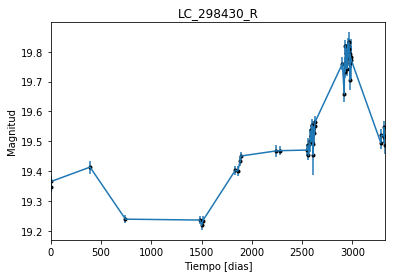

In [2]:
data = np.genfromtxt('LC_298430_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_298430_R')
plt.savefig("LC_298430_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

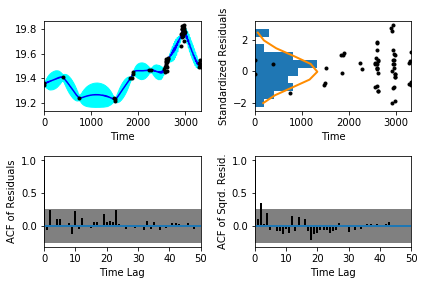

In [5]:
sample.assess_fit()

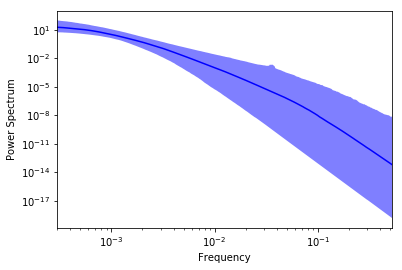

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

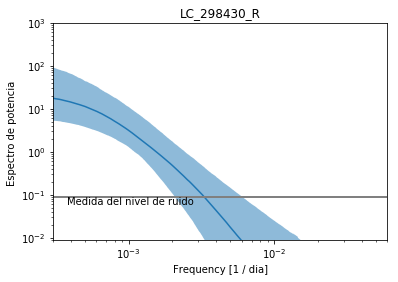

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_298430_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_298430_R')

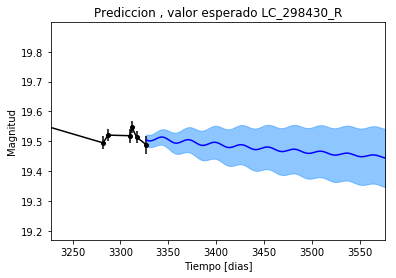

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_298430_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_298430_R')

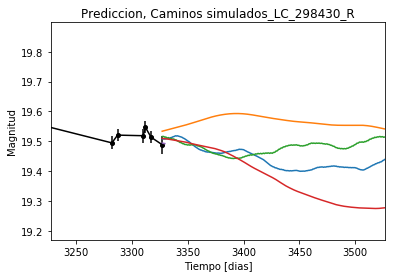

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_298430_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


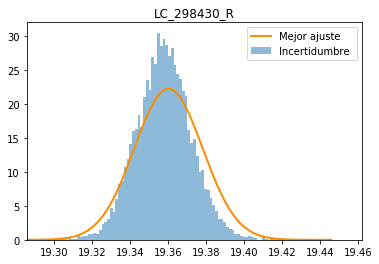

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_298430_R')
plt.savefig("Mejor_ajuste_LC_297623_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_R')

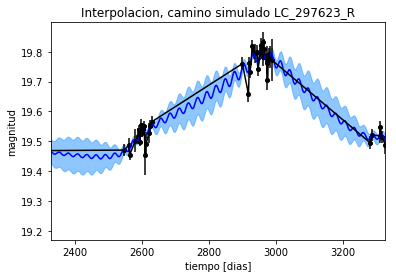

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_R')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_R')

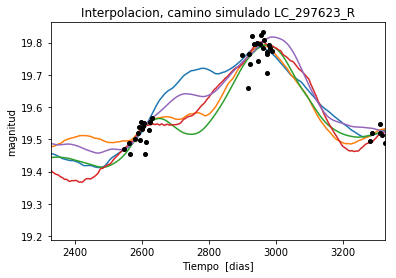

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 685.70570577
Median: 0.0121712140689
Standard deviation: 0.202732179248
68% credibility interval: [ 0.0008439   0.21191393]
95% credibility interval: [  3.56031547e-04   8.00143598e-01]
99% credibility interval: [  3.09697234e-04   9.75236693e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 957.273560942
Median: 0.000975362299382
Standard deviation: 0.0634271530913
68% credibility interval: [ 0.00040052  0.01086529]
95% credibility interval: [ 0.00031158  0.17624445]
99% credibility interval: [  3.03438695e-04   4.47797410e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 299.893977601
Median: 0.0160501547816
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 762.809926944
Median: 118.094154784
Standard deviation: 1.61683952412
68% credibility interval: [ 116.31993609  119.23235363]
95% credibility interval: [ 113.97343422  119.98917588]
99% credibility interval: [ 112.15432147  122.8696531 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 400.160361096
Median: 0.717315358168
Standard deviation: 2.12345663132
68% credibility interval: [ 0.04465474  4.00435726]
95% credibility interval: [ 0.01208079  7.03598114]
99% credibility interval: [ 0.00935797  9.0603875 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 620.381339602
Median: 0.19269187407
Standard deviation: 6.66511540568
68% credibility interval: [ 0.01003595  3.68399783]
95% credibility interval: [  6.06198445e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 60951.5229733
Median: 3.98116558473e-21
Standard deviation: 1.38766443137e+34
68% credibility interval: [  1.18905316e-49   1.64456276e-06]
95% credibility interval: [  4.91028534e-101   8.85776766e-001]
99% credibility interval: [  6.38397295e-107   4.31227928e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2182.62287133
Median: 19.4235041524
Standard deviation: 0.10035492271
68% credibility interval: [ 19.33908982  19.50254386]
95% credibility interval: [ 19.20789351  19.62126257]
99% credibility interval: [ 19.06526658  19.71991967]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 484.45635145
Median: 0.0
Standard deviation: 0.186241480692
68% credibility interval: [ 0.          0.11323866]
95% credibility interval: [ 0.          0.75081994]
99% credibility interval: [ 0.          1.01739974]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 484.45635145
Median: 0.0
Standard deviation: 0.186241480692
68% credibility interval: [ 0.          0.11323866]
95% credibility interval: [ 0.          0.75081994]
99% credibility interval: [ 0.          1.01739974]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 640.175355596
Median: 0.0
Standard deviation: 0.000206218727005
68% credibility interval: [ 0.  

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 762.809926944
Median: 118.094154784
Standard deviation: 1.61683952412
68% credibility interval: [ 116.31993609  119.23235363]
95% credibility interval: [ 113.97343422  119.98917588]
99% credibility interval: [ 112.15432147  122.8696531 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3015.48206634
Median: 0.03051134198
Standard deviation: 0.0364543151742
68% credibility interval: [ 0.01743556  0.05998642]
95% credibility interval: [ 0.01176635  0.13414773]
99% credibility interval: [ 0.00934089  0.25590206]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1479.63795026
Median: 1.24735296965
Standard deviation: 0.196504693851
68% credibility interval: [ 1.06907738  1.46181802]
95% credibility interval: [ 0.91670653  1.69227363]
99% credibility interval: [ 0.8371316   1.83408572]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1316.17534584
Median: 3.09721925015e-05
Standard deviation: 0.00568790033178
68% credibility interval: [  9.61368281e-07   7.68219834e-04]
95% credibility interval: [  4.05349537e-08   7.77874048e-03]
99% credibility interval: [  6.32166240e-09   2.94297544e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 685.70570577
Median: (-0.0764739934083-0.421972326969j)
Standard deviation: 1.72971681619
68% credibility interval: [-1.33149450+0.j         -0.00530241-0.27425305j]
95% credibility interval: [ -5.02745050e+00+0.j          -2.23701219e-03-0.00131737j]
99% credibility interval: [ -6.12759286e+00+0.j          -1.94588511e-03-0.00174067j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 957.273560942
Median: (-0.00612838206865+0.131895972699j)
Standard deviation: 1.23619004935
68% credibility interval: [-0.06826862+1.43729595j -0.00251651+0.j        ]
95% credibility interval: [-1.10737655+3.14823807j -0.00195771+0.j        ]
99% credibility interval: [ -2.81359411e+00+1.47033821j  -1.90656155e-03+0.08821596j]
Posterior su